<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793108/blob/main/ReduccionDimensiones_A01793108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Jhonathan Ricardo Robayo Martínez

Matrícula: A01793108

Materia: Ciencia y Analítica de Datos

Profesor: Maria de la Paz Rico

Asesor: Juan Miguel Meza

Fecha: 2022-10-02

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [22]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.matmul(np.matmul(W, D), Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [43]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("--------Matriz A---------")
print(A)
print("-----------------------------")

values, vectors = np.linalg.eig(A)
print(values) #D
print(vectors) #W

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B = np.round(np.matmul(np.matmul(W, D), Winv)) 
print(B)

--------Matriz A---------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [35]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("--------Matriz A2---------")
print(A2)
print("-----------------------------")

values, vectors = np.linalg.eig(np.abs(A2))
print(values) #D
print(vectors) #W

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B = np.round(np.matmul(np.matmul(W, D), Winv) )
print(B)

--------Matriz A2---------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [42]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("--------Matriz A3---------")
print(A3)
print("-----------------------------")

values, vectors = np.linalg.eig(np.abs(A3))
print(values) #D
print(vectors) #W

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B = np.round(np.matmul(np.matmul(W, D), Winv) )
print(B)

--------Matriz A3---------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


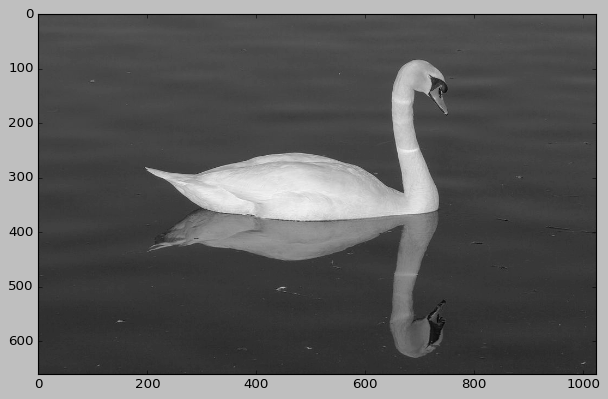

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FC616A82410>


In [56]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6)) 
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [2]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

In [3]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

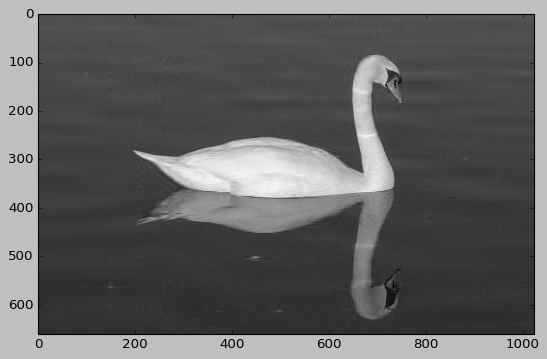

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[107. 104. 102. ... 114. 103.  92.]


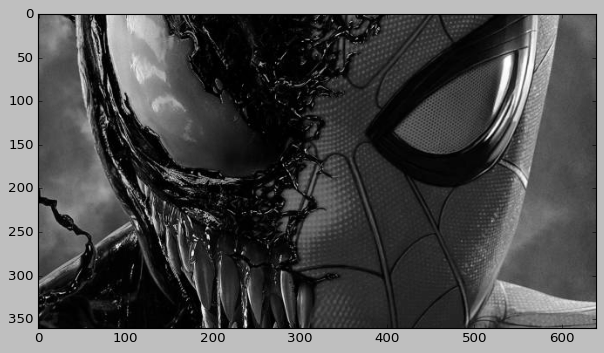

<PIL.Image.Image image mode=LA size=640x360 at 0x7FC6169CA210>


In [65]:
#imagen 1
img = Image.open(urllib.request.urlopen("https://as01.epimg.net/meristation/imagenes/2019/10/15/noticias/1571137562_437495_1571137608_noticia_normal_recorte1.jpg")).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6)) 
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


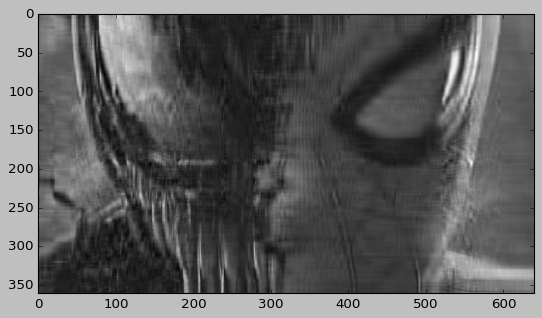

Felicidades la imagen está comprimida


In [66]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[198. 198. 198. ... 146. 146. 147.]


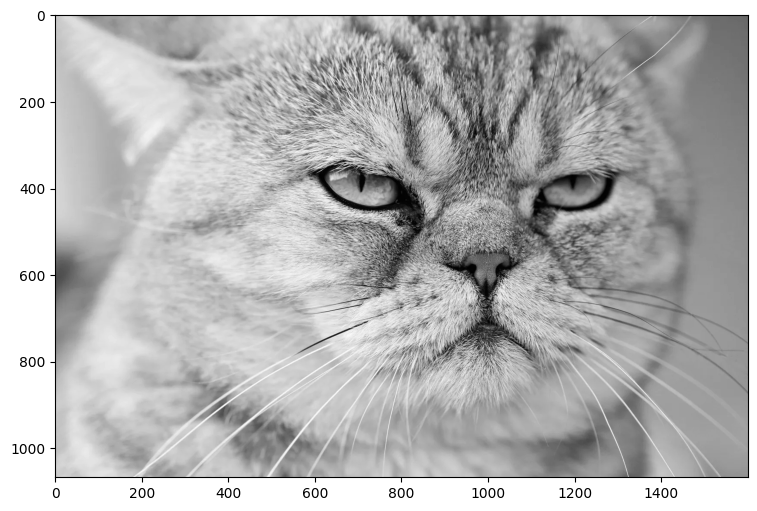

<PIL.Image.Image image mode=LA size=1600x1067 at 0x7FC602A66490>


In [84]:
#imagen 2
img = Image.open(urllib.request.urlopen("https://static.nationalgeographic.es/files/styles/image_3200/public/75552.ngsversion.1422285553360.webp?w=1600&h=1067")).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6)) 
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


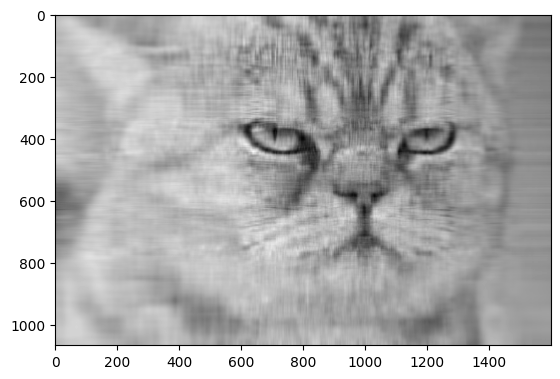

Felicidades la imagen está comprimida


In [85]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[196. 196. 196. ... 171. 171. 171.]


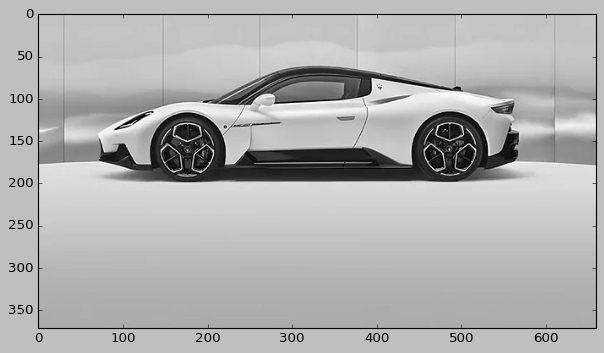

<PIL.Image.Image image mode=LA size=660x371 at 0x7FC617E33E10>


In [68]:
#imagen 3
img = Image.open(urllib.request.urlopen("https://phantom-marca.unidadeditorial.es/a265b13a6925849bc0817da1539e74dc/resize/660/f/webp/assets/multimedia/imagenes/2020/09/09/15996787356805.jpg")).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6)) 
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


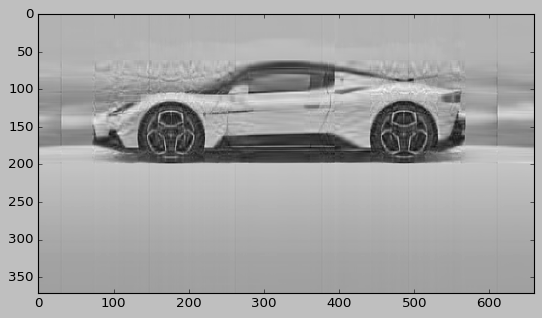

Felicidades la imagen está comprimida


In [69]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




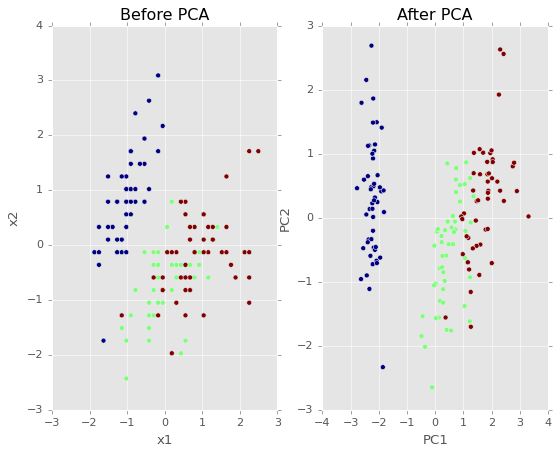

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [81]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)) ## varianza total explicada por los dos componentes

[0.72962445 0.22850762]
0.9581320720000165


In [74]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [75]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [76]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [77]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

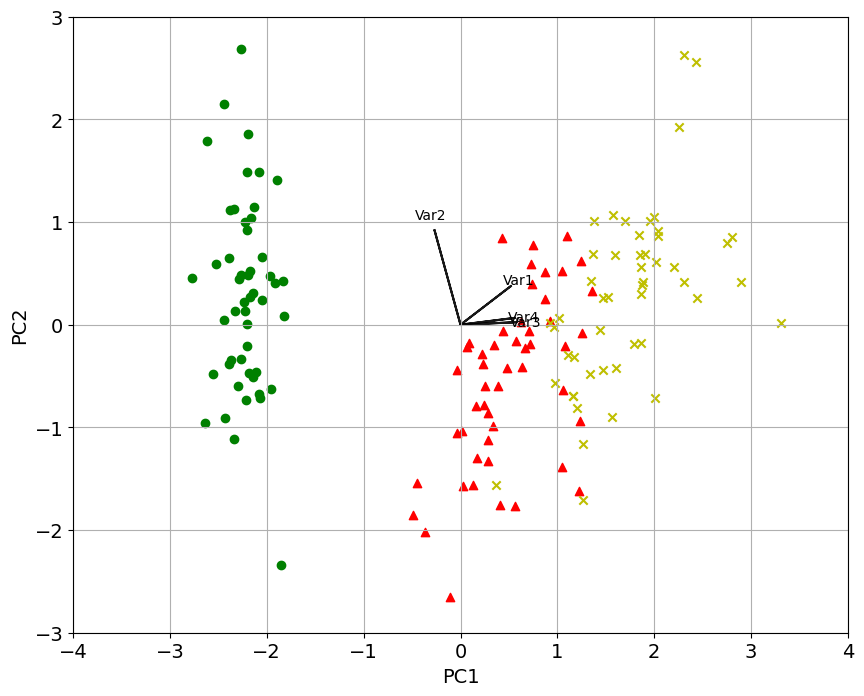

In [78]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [79]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [80]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

El análisis de componentes principales es una de las técnicas más frecuentes para reducir la dimensionalidad, quedandonos solo con la información más escencial, no obstante, frecuentemente los métodos lineales son limitados para el mundo real, mientras que los kernel no.

Es interesante apreciar como tan solo dos componentes pueden resumir cerca del 95% de la información, donde el primer componente representa el 73%.

Es claramente notorio que en el primer gráfico, la variable x1 presenta una mayor variabilidad, si la comparamos con la x2, lo cual es confimado cuando se representan los resultados del ACP.

Para identificar las variables más importantes dentro de los componentes, es necesario observar la magnitud de los vectores propios. Para el componente uno la cartacterística la más relevante por poco es la tercera, seguida de la cuarta y primera. Esto cambia para el segundo componente que la segunda característica es el más importante por mucho, seguida de la primera.

Finalmente, graficar las características para los componentes principales uno y dos, nos permite examinar las relaciones entre los mismos, podemos ver como es de importante o relacionado con el primer componente las características uno, tres y cuatro, donde tres y cuatro en algo participa en el segundo componente como se veía en la magnitud del vector propio en los componentes.

# Preguntas y respuestas

## Qué es feature importance y para que nos sirve?

Nos permite identificar que variables o características son las más importantes dentro de cada componente principal que disponemos. Usualmente con este resultado es posible identificar si en el primer componente las variables más importantes describen el comportamiento de consumo, con lo cual al parecer solo analizando esas variables podríamos entender a los clientes. 

Adicionalmente, supongamos que, en el siguiente componente más importante, se encuentren las variables sociodemográficas, por lo que solo con el análisis de las dos bastaría para entender a todos los clientes, claro está si es que concentran una gran cantidad de la variabilidad. 

Esto permite seleccionar tan solo un puñado de variables cuando se disponen cientos.

## Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

No conocía que la singular value decomposition podía aplicarse para el tratamiento de imágenes, eso fue algo totalmente nuevo.

Estimar las valores desde cero en python para constuir un ACP, tampoco lo había desarrollado dado que vengo desde R, lugar donde es más fácil hacer este tipo de procedimientos dado que está orientado más para la estadística.

## Dónde lo aplicarías o te sería de utilidad este conocimiento?

En lo que frecuentemente utilizo este conocimiento es para de un conjunto de datos correlacionados, detectar cuales podrían ser los más relevantes.

Quisiera conocer más cerca de como usarlo en imagenes, pero se me ocure que podría usarse para anonimizar a las personas.